In [16]:
df.iloc[:, 2:]

,erik,hattie,michael,sandra,dan
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


In [69]:
import pandas as pd
import io
x = io.StringIO("""cost	item	erik	hattie	michael	sandra	dan	ke	val
54	mcdonalds	1	1	1	0	0	0	1
187	groceries	1.25	1	1	0	0	0	0
55	gas	1	1	1	0.5	0	.5	.5
59.83	food delivery	1	1	1	0	0	0	0
111	food delivery	1	1	1	0	0	0	0
181	dinner	1	1	1	1	0	1	0
535.86	hotel	1	1	1	0	1	0	0"""
)
df = pd.read_table(x)
df2 = df.set_index(['cost','item'])
df2 = df2.astype(float)
df2 /= df2.sum(1).values[:, None]
# df2 = df.copy()
# df2['owes'] = df[]
df['cost']
(df2 * df['cost'].values[:,None]).sum(0).round(2)

erik       324.75
hattie     310.37
michael    310.37
sandra      42.31
dan        133.96
ke          42.31
val         19.61
dtype: float64

In [70]:
df2.round(2)

,,erik,hattie,michael,sandra,dan,ke,val
cost,item,,,,,,,
54.00,mcdonalds,0.25,0.25,0.25,0.00,0.00,0.00,0.25
187.00,groceries,0.38,0.31,0.31,0.00,0.00,0.00,0.00
55.00,gas,0.22,0.22,0.22,0.11,0.00,0.11,0.11
59.83,food delivery,0.33,0.33,0.33,0.00,0.00,0.00,0.00
111.00,food delivery,0.33,0.33,0.33,0.00,0.00,0.00,0.00
181.00,dinner,0.20,0.20,0.20,0.20,0.00,0.20,0.00
535.86,hotel,0.25,0.25,0.25,0.00,0.25,0.00,0.00


In [71]:
df3 = (df2 * df['cost'].values[:,None]).round(2)
df3

,,erik,hattie,michael,sandra,dan,ke,val
cost,item,,,,,,,
54.00,mcdonalds,13.50,13.50,13.50,0.00,0.00,0.00,13.50
187.00,groceries,71.92,57.54,57.54,0.00,0.00,0.00,0.00
55.00,gas,12.22,12.22,12.22,6.11,0.00,6.11,6.11
59.83,food delivery,19.94,19.94,19.94,0.00,0.00,0.00,0.00
111.00,food delivery,37.00,37.00,37.00,0.00,0.00,0.00,0.00
181.00,dinner,36.20,36.20,36.20,36.20,0.00,36.20,0.00
535.86,hotel,133.96,133.96,133.96,0.00,133.96,0.00,0.00


In [72]:
df3.sum(0)

erik       324.74
hattie     310.36
michael    310.36
sandra      42.31
dan        133.96
ke          42.31
val         19.61
dtype: float64

In [1]:
# %load_ext autoreload
# %autoreload 2
# from nn.value import Value
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from nn.value import Value, exp, log, softmax
from nn.module import Layer, MLP, Relu, Tanh

%matplotlib inline
np.random.seed(1337)
random.seed(1337)

# Regression

In [2]:
# x = 4.
x = torch.tensor(4., requires_grad=True)
y = x*2
y.retain_grad()
z = y*4
z.backward()
z.retain_grad()
x.grad, y.grad, z.grad, z

(tensor(8.), tensor(4.), None, tensor(32., grad_fn=<MulBackward0>))

In [3]:
backend = 'Value'
x1, x2 = 1., -1.
w1, w2 = .1, .04
if backend == 'Value':
    f = Value
    exp_ = exp
    log_ = log
elif backend == 'torch':
    f = torch.tensor
    exp_ = torch.exp
    log_ = torch.log
else:
    raise ValueError(f'{backend} is invalid')

x1, x2, w1, w2 = f(x1), f(x2), f(w1), f(w2)
parameters = [x1, x2, w1, w2]

for p in parameters:
    # only for torch
    p.requires_grad = True

# forward
z = x1*2
y = log_(z) + exp_(z)  # this breaks things!

# zero
for p in parameters:
    p.grad = 0.0 if backend == 'Value' else torch.tensor(0.0)

y.backward()

x1.grad, x2.grad, w1.grad, w2.grad

(15.7781121978613, 0.0, 0.0, 0.0)

In [4]:
backend = 'torch'
x1, x2 = 1., -1.
w1, w2 = .1, .04
if backend == 'Value':
    f = Value
    exp_ = exp
    log_ = log
elif backend == 'torch':
    f = torch.tensor
    exp_ = torch.exp
    log_ = torch.log
else:
    raise ValueError(f'{backend} is invalid')

x1, x2, w1, w2 = f(x1), f(x2), f(w1), f(w2)
parameters = [x1, x2, w1, w2]

for p in parameters:
    # only for torch
    p.requires_grad = True

# forward
z = x1*2  # this breaks things!
y = log_(z) + exp_(z)  # this breaks things!

# zero
for p in parameters:
    p.grad = 0.0 if backend == 'Value' else torch.tensor(0.0)

y.backward()

x1.grad, x2.grad, w1.grad, w2.grad,y

(tensor(15.7781),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(8.0822, grad_fn=<AddBackward0>))

In [5]:
# x = 4.
x = torch.tensor(1., requires_grad=True)
y = x*2
y.retain_grad()
z = torch.log(y) + torch.exp(y)
z.backward()
x.grad, y.grad, z.grad, z

/var/folders/nw/lktt921x1wg_wt5tfy5q9k2c0000gn/T/ipykernel_63674/3268843017.py:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  x.grad, y.grad, z.grad, z


(tensor(15.7781), tensor(7.8891), None, tensor(8.0822, grad_fn=<AddBackward0>))

In [6]:
# x = 4.
x = Value(1, name='x')
y = x*2; y.name='y'
l1 = log(y); l1.name = 'l1'
e1 = exp(y); e1.name='e1'
z = l1+e1; z.name='z'
z.backward()
x.grad, y.grad, z.grad, z

(15.7781121978613, 7.88905609893065, 1.0, Value(z=8.082203279490596, grad=1.0))

In [7]:
z.topo_sort()

[Value(z=8.082203279490596, grad=1.0),
 Value(l1=0.6931471805599453, grad=1.0),
 Value(y=2, grad=7.88905609893065),
 Value(x=1, grad=15.7781121978613),
 Value(2, grad=7.88905609893065),
 Value(e1=7.38905609893065, grad=1.0)]

In [9]:
list(z.topo_sort2())

[Value(z=8.082203279490596, grad=1.0),
 Value(e1=7.38905609893065, grad=1.0),
 Value(l1=0.6931471805599453, grad=1.0),
 Value(y=2, grad=7.88905609893065),
 Value(2, grad=7.88905609893065),
 Value(x=1, grad=15.7781121978613)]

In [200]:
import math
x = 1
y = x*2
z = math.exp(y) + math.log(y)
z

8.082203279490596

In [201]:
import math
h = .0001
x = 1 + h
y = x*2
z2 = math.exp(y) + math.log(y)
z2

8.08378123350169

In [166]:
(z2 - z) / h

15.779540110933965

In [2]:
from sklearn.datasets import make_regression
X, y = X_raw, y_raw = make_regression(n_samples=50, n_features=10)

In [33]:
net = MLP(10, [1], act=Relu)

In [34]:
X=[[x_ for x_ in x]for x in X_raw]
batch_size = len(X)
lr = .1

for i in range(50):
    #forward
    y_logits = net(X)

    # hacky MSE loss
    loss = sum((y1-y2)**2  for y1, y2 in zip(y_logits, y)) / batch_size
    loss = loss[0]

    #backward
    for p in net.parameters():
        p.grad = 0

    loss.backward()
    # print(mlp.parameters())
    # if i==0 or i % 10 == 0:
    # y_preds = [y[0].data>y[1].data for y in y_logits]
    # acc = (np.array(y_preds) == y).mean()
    print('loss', loss.data)#, 'reg_loss', reg_loss.data)
    # for p in net.parameters():
    #     print(f'{p.name}={p.data:.2f} grad={p.grad:.5f}')
    
    for p in net.parameters():
        p.data -= p.grad * lr

loss 37677.42694340859
loss 21668.051695859813
loss 13229.453934626643
loss 8554.65904705731
loss 5826.4540340151025
loss 4149.244946344627
loss 3065.6865016135635
loss 2333.117011143112
loss 1817.5439107151747
loss 1441.9415339183718
loss 1160.2486095875302
loss 943.8557642390219
loss 774.3431934493794
loss 639.4446088148101
loss 530.7304746406978
loss 442.2368638426177
loss 369.6304298212492
loss 309.6860857927308
loss 259.9519224336515
loss 218.52896983427942
loss 183.92299131506036
loss 154.94242021850422
loss 130.626464822462
loss 110.19333855143715
loss 93.00218964470182
loss 78.52454757291173
loss 66.3225164633599
loss 56.03184907238157
loss 47.34862070015342
loss 40.01860801436364
loss 33.82873536467268
loss 28.6001260317944
loss 24.182416526286374
loss 20.449076772555692
loss 17.293539552973378
loss 14.62598662174307
loss 12.370671491482042
loss 10.46368342722394
loss 8.851075938275516
loss 7.487297605126147
loss 6.333874506889743
loss 5.358302595187325
loss 4.533115646357227


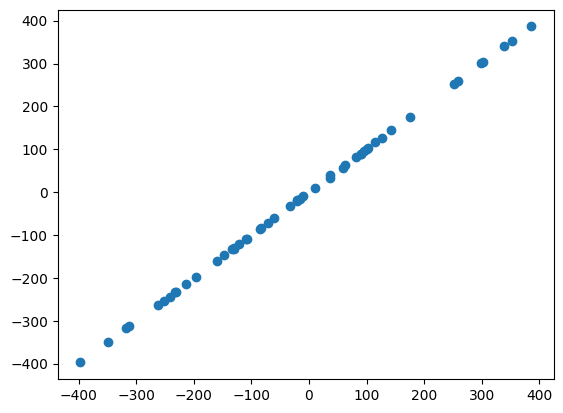

In [35]:
y_pred = [[y_.data for y_ in y] for y in y_logits]
plt.scatter(y_pred, y)

# Classification

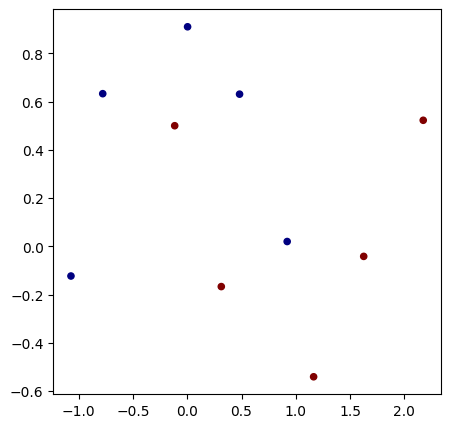

In [135]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X_raw, y_raw = X, y = make_moons(n_samples=50, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [160]:
# doesn't work yet...
net = MLP(2, [14, 2], act=Relu)

In [161]:
batch_size = len(X)
lr = .1
    
for i in range(1):
    #forward
    y_logits = net(X)
    y_probs = [softmax(y_logits_) for y_logits_ in y_logits]

    # nll loss
    nll_loss = -sum(log(y_probs_[y_true]) for y_probs_, y_true in zip(y_probs, y)) #/ batch_size
    # L2
    # reg_loss = 1e-3 * sum(p**2 for p in net.parameters())**(.5)
    loss = nll_loss #+ reg_loss
        
    #backward
    for p in net.parameters():
        p.grad = 0

    loss.backward()
    # print(mlp.parameters())
    # if i==0 or i % 10 == 0:
    print('loss', loss.data, 'nll_loss', nll_loss.data)#, 'reg_loss', reg_loss.data)
    for p in net.parameters():
        print(f'{p.name}={p.data:.2f} grad={p.grad:.5f}')
    
    for p in net.parameters():
        p.data -= p.grad * lr

loss 0.6719577466376111 acc 0.6
loss 0.7903344123130323 acc 0.6
loss 0.620698969298057 acc 0.6
loss 0.4853201603226649 acc 0.6
loss 0.2708111160638335 acc 0.6
loss 0.2076621619727067 acc 0.7
loss 0.17665720953848998 acc 0.7
loss 0.1598181222092354 acc 0.7
loss 0.14679938160030434 acc 0.7
loss 0.13565967431899192 acc 0.7
loss 0.12580206407030106 acc 0.7
loss 0.1169763582594271 acc 0.6
loss 0.10902243890279897 acc 0.6
loss 0.10181800748455117 acc 0.6
loss 0.09526450792115573 acc 0.6
loss 0.08928087334138068 acc 0.6
loss 0.08379964005444009 acc 0.6
loss 0.078764111597509 acc 0.6
loss 0.07412621426878722 acc 0.6
loss 0.06984484685449875 acc 0.6
loss 0.0658845743592317 acc 0.6
loss 0.06221429224443138 acc 0.6
loss 0.05880694638903207 acc 0.6
loss 0.05563908737766365 acc 0.6
loss 0.052689985866720204 acc 0.6
loss 0.049941220023429524 acc 0.6
loss 0.04737634094151986 acc 0.6
loss 0.044980598036066126 acc 0.6
loss 0.042740711999663526 acc 0.6
loss 0.040644685744236436 acc 0.6
loss 0.0386816458